In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./maternal health data set 1/Maternal Health Risk Data Set 1.csv')



df.info()

df.describe()

df.isnull().sum()

df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


(1014, 7)

In [2]:

df.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

In [3]:
df.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

In [4]:
df['RiskLevel'].unique()



array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [5]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

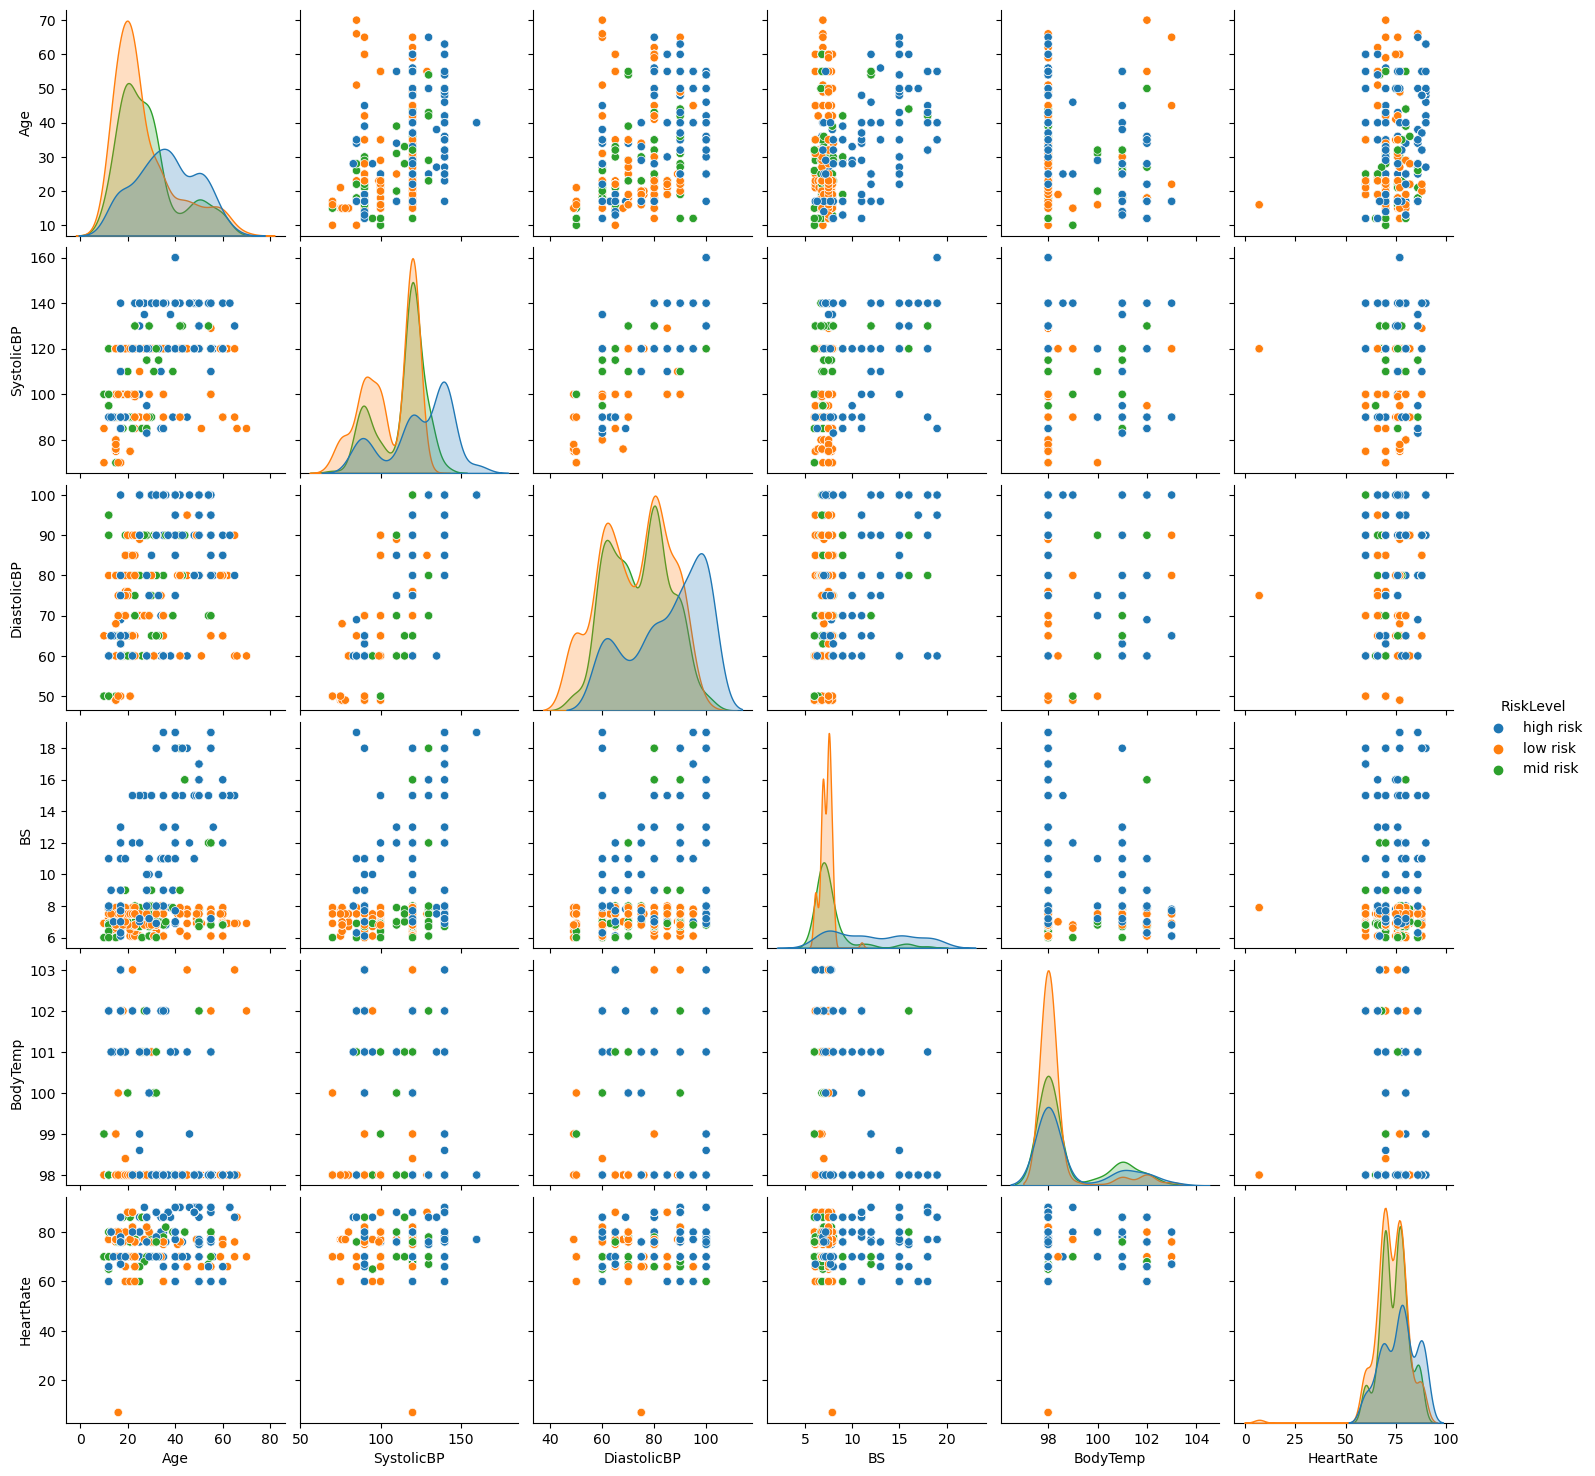

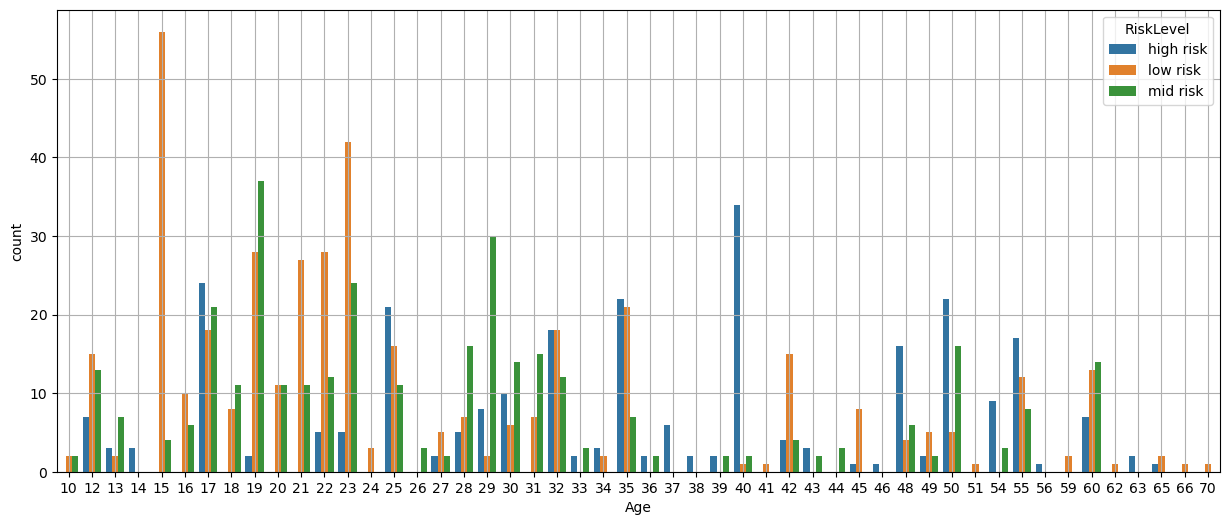

In [6]:
sns.pairplot(df,hue='RiskLevel')

plt.figure(figsize=(15,6))
sns.countplot(x='Age',hue='RiskLevel',data=df)
plt.grid()

C:\Users\alokk\AppData\Local\Temp\ipykernel_13624\1218627674.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


<Axes: >

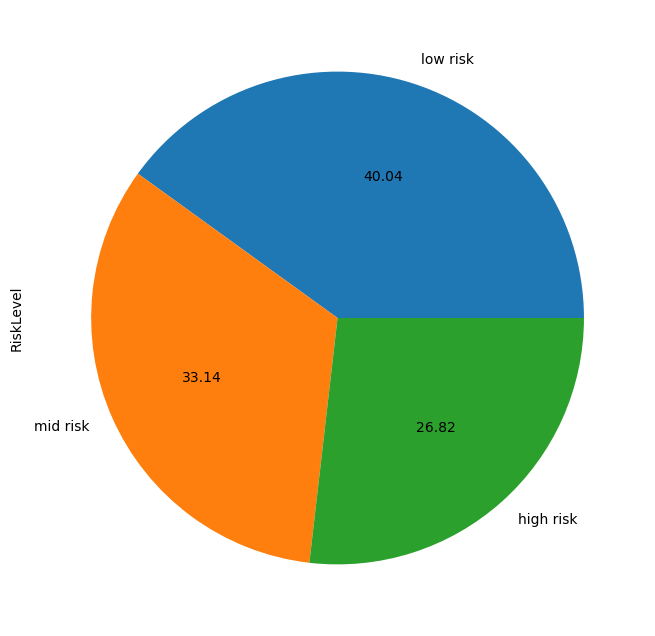

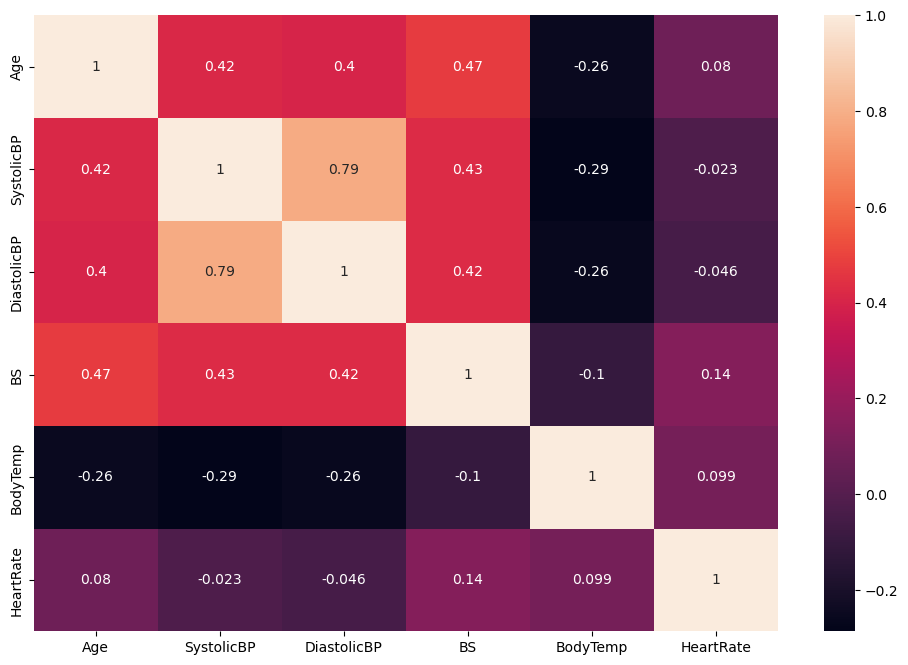

In [7]:
df['RiskLevel'].value_counts().plot.pie(autopct='%.2f',figsize=(8,8))

correlation =df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot =True)

<Axes: xlabel='Age', ylabel='Count'>

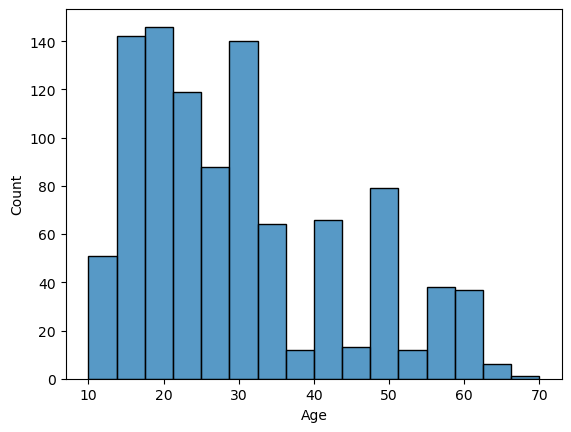

In [8]:
df['RiskLevel']=df['RiskLevel'].map({'low risk':0,'mid risk':1,'high risk':2})

sns.histplot(df['Age'],)

<Axes: xlabel='DiastolicBP', ylabel='SystolicBP'>

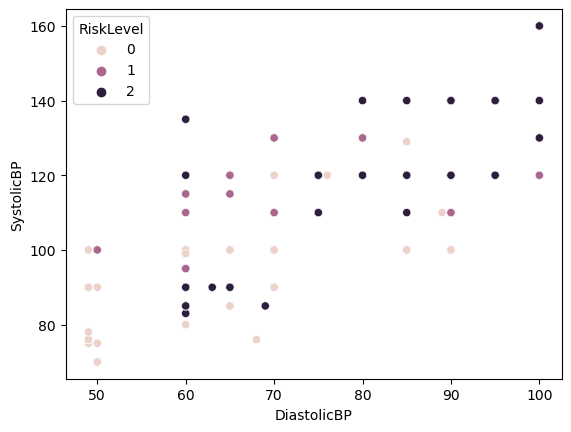

In [9]:
sns.scatterplot(x='DiastolicBP',y='SystolicBP',hue='RiskLevel', data=df)

<Axes: xlabel='RiskLevel', ylabel='BS'>

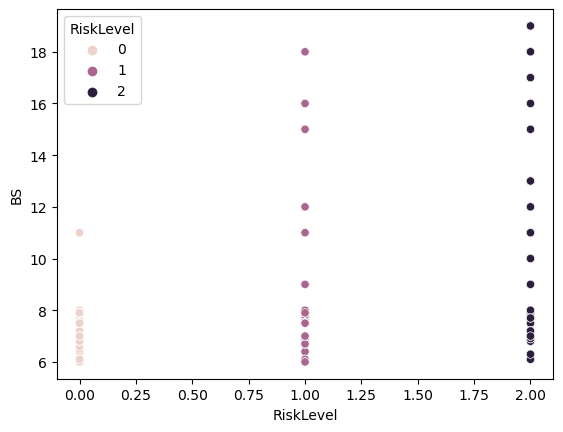

In [10]:
sns.scatterplot(x='RiskLevel',y='BS',hue='RiskLevel',data=df)

<Axes: xlabel='Age', ylabel='BS'>

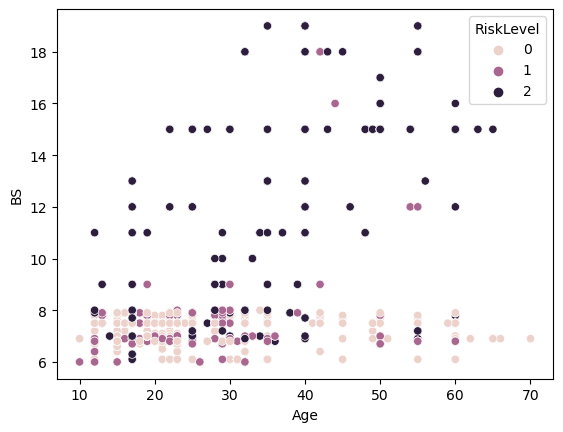

In [11]:
sns.scatterplot(x='Age',y='BS',hue='RiskLevel',data=df)

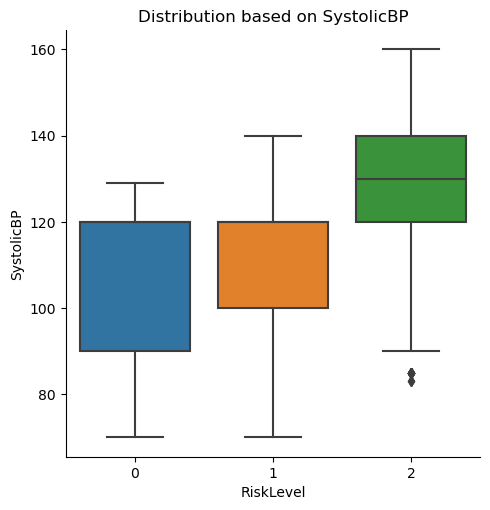

In [12]:
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")

In [13]:
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")

In [14]:

X= df.drop('RiskLevel',axis=1)
y= df['RiskLevel']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)

X_train.size

X_test.size

y_train.value_counts()

0    311
1    244
2    205
Name: RiskLevel, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
pred= model.predict(X_test)

In [20]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<Axes: >

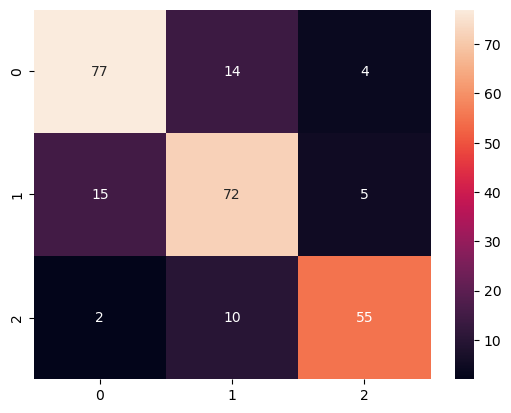

In [21]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.75      0.78      0.77        92
           2       0.86      0.82      0.84        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.81       254
weighted avg       0.80      0.80      0.80       254



In [23]:
from sklearn.preprocessing import StandardScaler  

In [24]:
scale = StandardScaler()  
X_train= scale.fit_transform(X_train)    
X_test= scale.transform(X_test) 

X_train

array([[-0.60158195,  0.36677854,  0.25283285, -0.55181494,  3.07668957,
         0.19721219],
       [-0.97100848, -1.27615872, -0.83853197, -0.30466871,  3.07668957,
        -0.89239313],
       [-0.52769664,  1.46207005,  0.98040939, -0.58270822, -0.49582781,
        -0.52919136],
       ...,
       [-0.45381133,  0.36677854,  0.25283285, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.35892704, -0.72851297, -0.47474369, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.13727112,  1.46207005,  1.70798594, -0.55181494, -0.49582781,
         0.43934671]])

In [25]:
model5= DecisionTreeClassifier(criterion='gini', random_state=20)  


In [26]:
model5.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=20)

In [27]:
y_pred= model5.predict(X_test)  

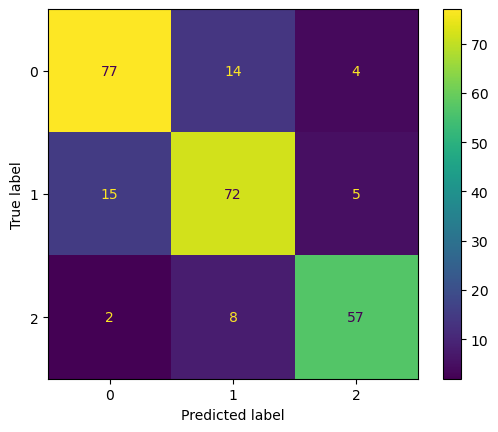

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)
disp.plot()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RF= RandomForestClassifier(criterion='gini')

In [33]:

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

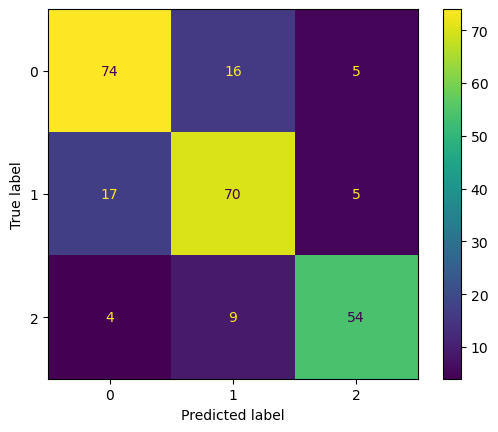

In [35]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()

In [36]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        95
           1       0.74      0.76      0.75        92
           2       0.84      0.81      0.82        67

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



In [37]:
from sklearn.neighbors import KNeighborsClassifier

import math

In [38]:
math.sqrt(len(y_test))

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn_pred=knn.predict(X_test)

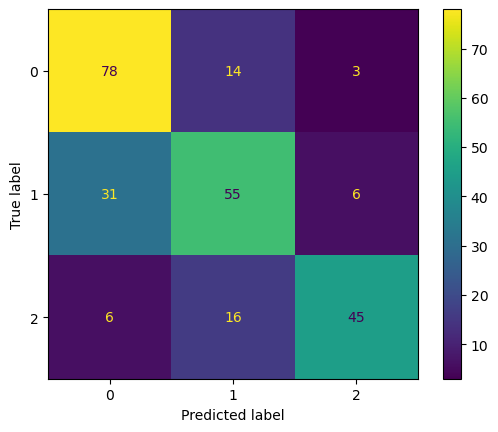

In [39]:
cn = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cn, display_labels=knn.classes_)
disp.plot()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [45]:

xgb.fit(X_train,y_train)

xgb_pred=xgb.predict(X_test)

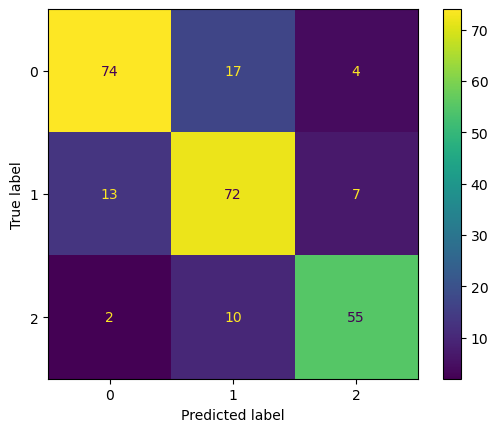

In [46]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot()

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.85      0.86        67

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.81      0.81      0.81       254



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    "learning_rate": [0.5,1,3,5],
    "reg_lambda": [0, 1,5, 10,20]
}

In [50]:
grid = GridSearchCV(xgb, param_grid,cv=3, scoring="roc_auc", n_jobs=-1)

In [51]:
grid.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 3, 5],
                         'reg_lambda': [0, 1, 5, 10, 20]},
             scoring='roc_auc')

In [52]:

grid.best_params_



{'learning_rate': 0.5, 'reg_lambda': 0}

In [53]:
grid.best_score_

nan

In [54]:
xgb = XGBClassifier(colsample_bytree= 0.5,gamma=0,learning_rate=0.1,max_depth=3,subsample=0.8,reg_lambda=0)

In [55]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [56]:
xgb_pred=xgb.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

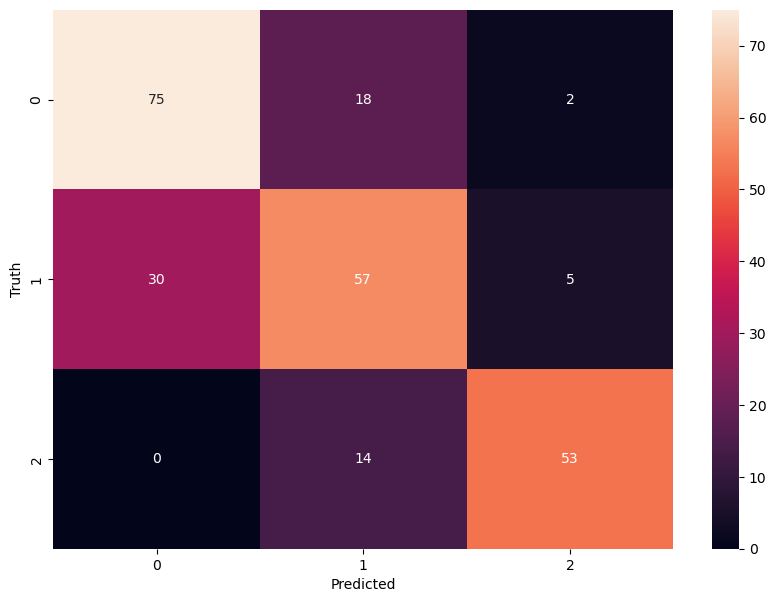

In [57]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        95
           1       0.64      0.62      0.63        92
           2       0.88      0.79      0.83        67

    accuracy                           0.73       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.73      0.73      0.73       254



In [59]:
param_grid={'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20,30],
    'criterion' :['gini', 'entropy']
    
}

In [60]:
gridsearchcv=GridSearchCV(RF,param_grid,cv=5)

gridsearchcv.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [61]:
gridsearchcv.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 500}

In [62]:
gridsearchcv.best_score_

0.8631578947368421

In [65]:
RF2= RandomForestClassifier(criterion='entropy',max_depth=30,max_features='log2',n_estimators=500)

In [66]:

RF2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=500)

In [67]:
rf_pred=RF2.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

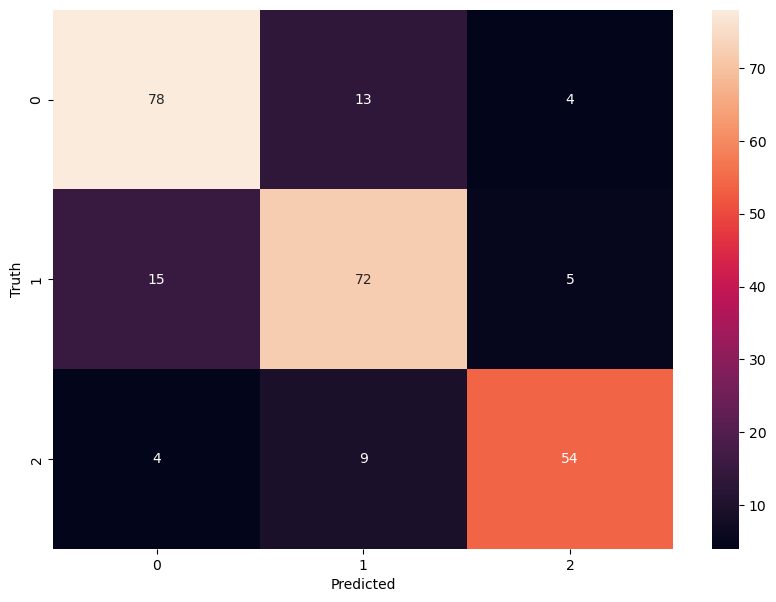

In [68]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        95
           1       0.77      0.78      0.77        92
           2       0.86      0.81      0.83        67

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.81       254
weighted avg       0.80      0.80      0.80       254



In [70]:
from sklearn.svm import SVC

svc= SVC(kernel='poly')

In [71]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [72]:
svc_pred=svc.predict(X_test)

In [73]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.51      0.92      0.66        95
           1       0.42      0.15      0.22        92
           2       0.77      0.60      0.67        67

    accuracy                           0.56       254
   macro avg       0.57      0.55      0.52       254
weighted avg       0.55      0.56      0.50       254



In [74]:

import lime
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [75]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
rf_pred = RF.predict(X_test)

In [77]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        95
           1       0.75      0.76      0.76        92
           2       0.84      0.81      0.82        67

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254



In [84]:
X_train

array([[-0.60158195,  0.36677854,  0.25283285, -0.55181494,  3.07668957,
         0.19721219],
       [-0.97100848, -1.27615872, -0.83853197, -0.30466871,  3.07668957,
        -0.89239313],
       [-0.52769664,  1.46207005,  0.98040939, -0.58270822, -0.49582781,
        -0.52919136],
       ...,
       [-0.45381133,  0.36677854,  0.25283285, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.35892704, -0.72851297, -0.47474369, -0.36645527, -0.49582781,
        -1.01346039],
       [ 0.13727112,  1.46207005,  1.70798594, -0.55181494, -0.49582781,
         0.43934671]])

In [86]:
# LIME analysis
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns)
lime_explanations = []
for i in range(5):  # Generate explanations for 5 instances
    explanation = explainer.explain_instance(X.iloc[i], RF.predict_proba, num_features=len(X.columns))
    lime_explanations.append(explanation)



In [79]:
# SHAP analysis
explainer = shap.Explainer(RF)
shap_values = explainer.shap_values(X_test)

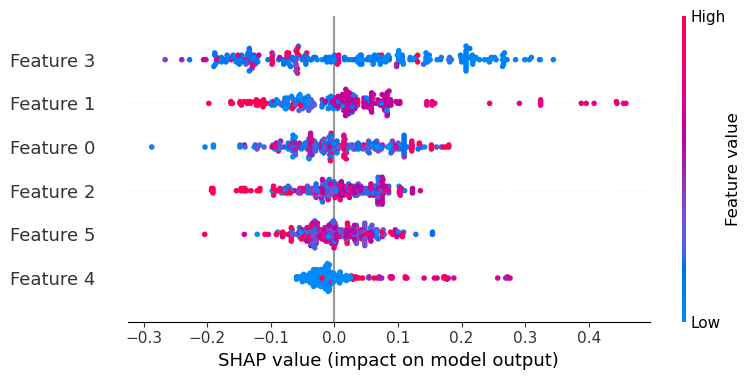

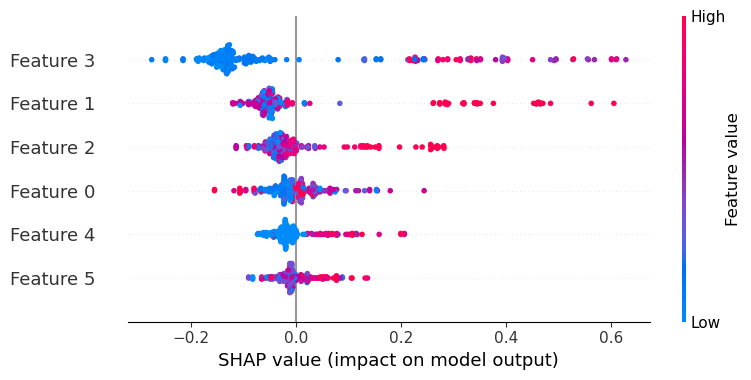

In [93]:
# Visualize LIME explanations and SHAP values
for i in range(3):  # Visualize explanations for 5 instances
    lime_explanations[i].show_in_notebook()
    shap.summary_plot(shap_values[i], X_test)
    


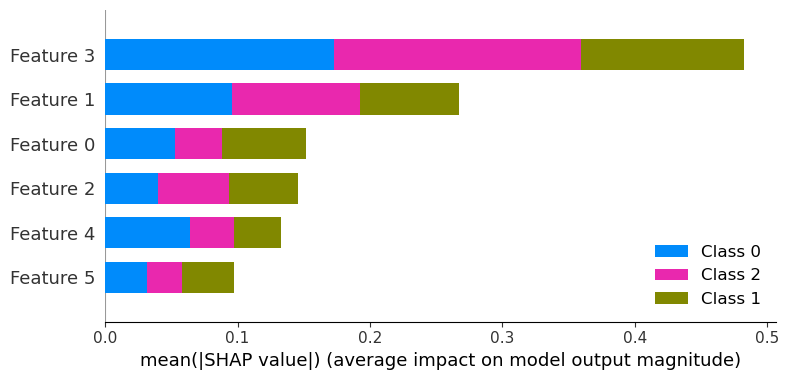

In [96]:

import shap

explainer = shap.Explainer(RF)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)




No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


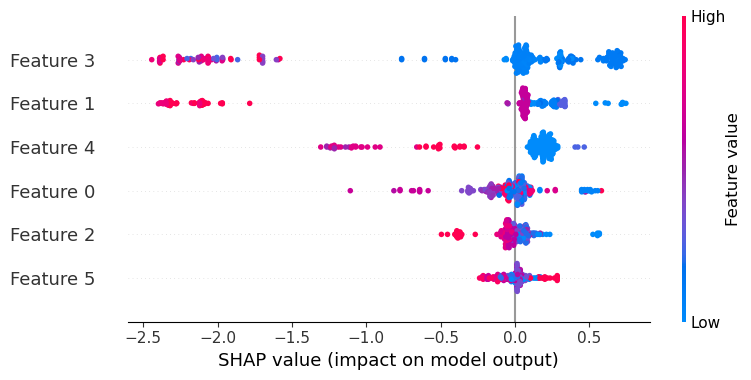

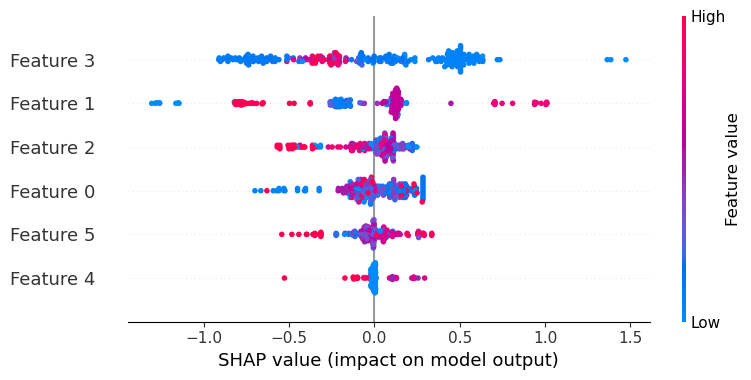

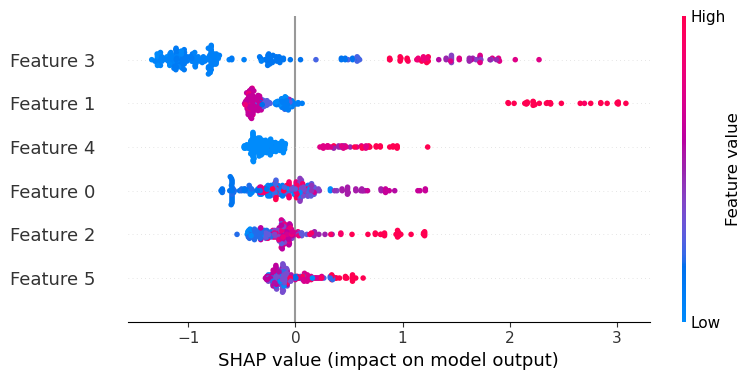

In [99]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)
for i in range(3):
    shap.summary_plot(shap_values[i], X_test)

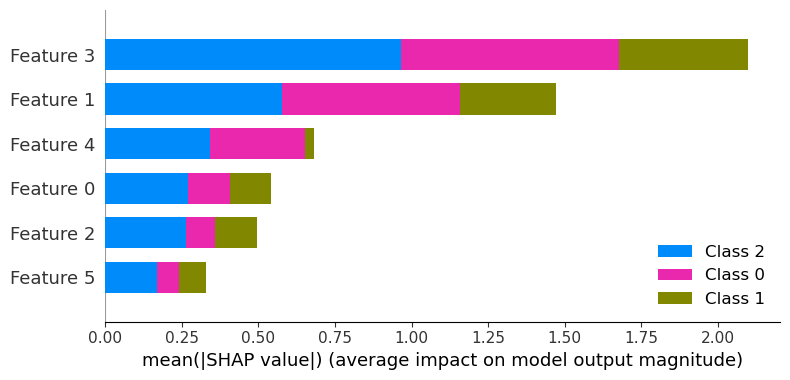

In [98]:
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


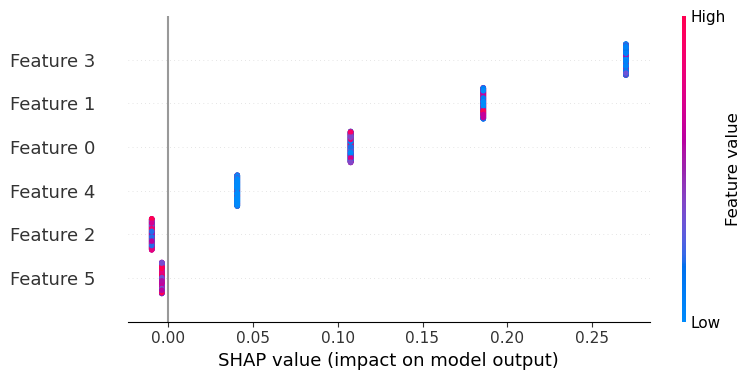

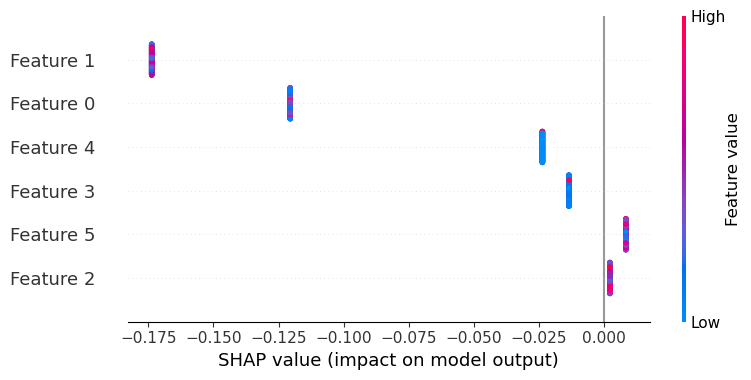

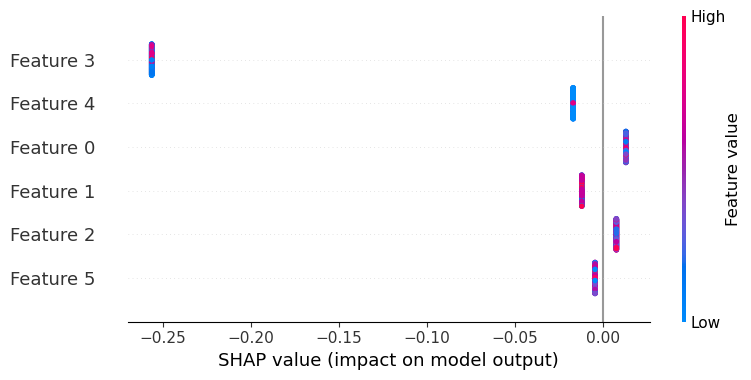

In [100]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
for i in range(3):
    shap.summary_plot(shap_values[i], X_test)

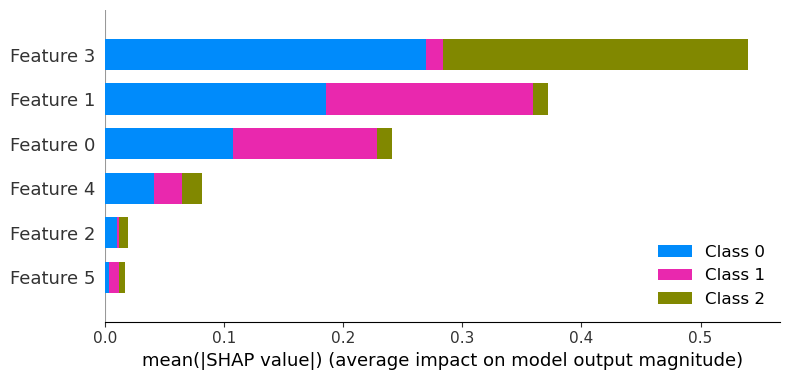

In [101]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


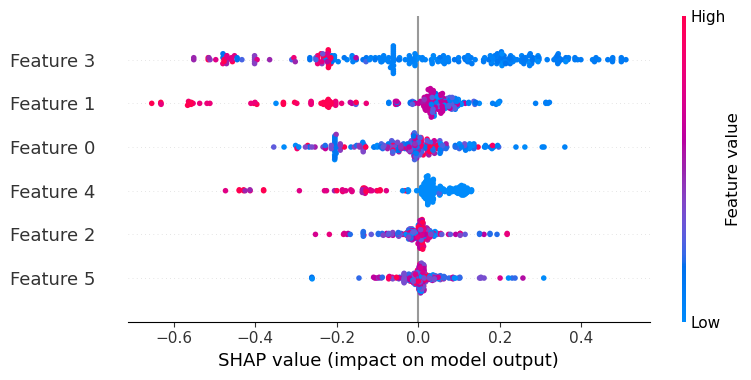

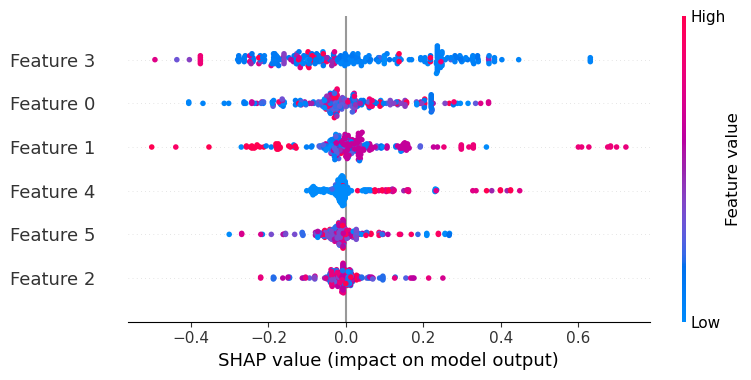

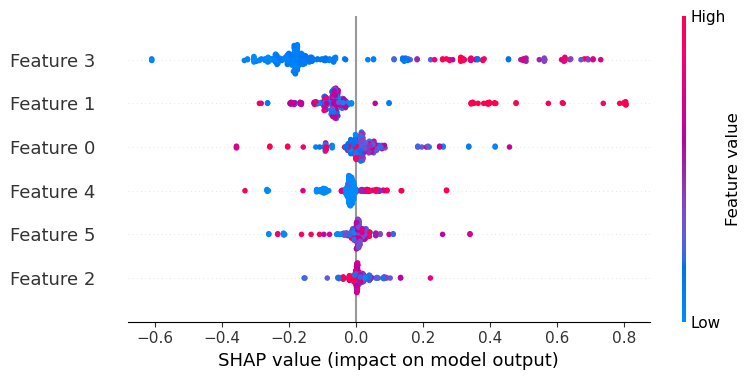

In [102]:
explainer = shap.Explainer(model5)
shap_values = explainer.shap_values(X_test)
for i in range(3):
    shap.summary_plot(shap_values[i], X_test)

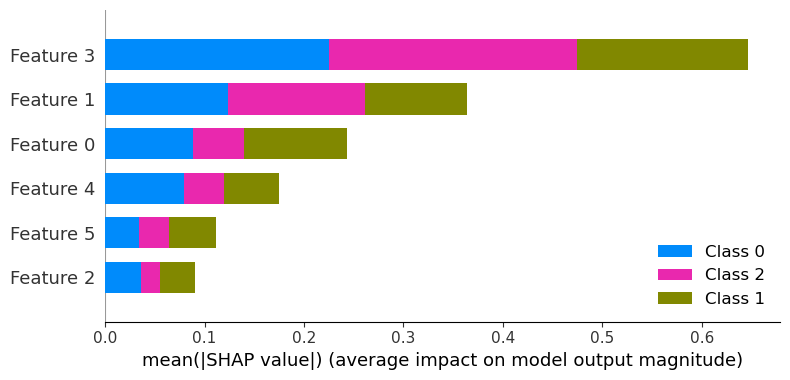

In [103]:
explainer = shap.Explainer(model5)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

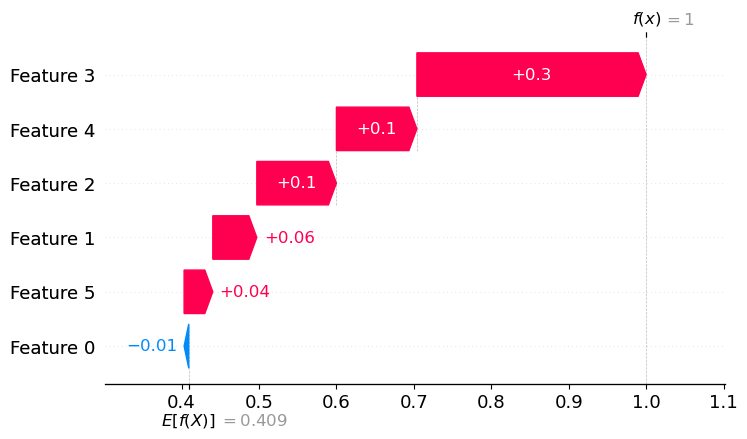

In [111]:

explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value)
shap.waterfall_plot(explanation[0])

In [ ]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# logreg.fit(X_train, y_train)

# logreg_pred = logreg.predict(X_test)

# print(classification_report(y_test, logreg_pred))

# from sklearn.naive_bayes import GaussianNB

# nb = GaussianNB()

# nb.fit(X_train, y_train)

# nb_pred = nb.predict(X_test)

# print(classification_report(y_test, nb_pred))

# from sklearn.svm import LinearSVC

# svm = LinearSVC()

# svm.fit(X_train, y_train)

# svm_pred = svm.predict(X_test)

# print(classification_report(y_test, svm_pred))

# from sklearn.ensemble import AdaBoostClassifier

# ada = AdaBoostClassifier()

# ada.fit(X_train, y_train)

# ada_pred = ada.predict(X_test)

# print(classification_report(y_test, ada_pred))

# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier()

# mlp.fit(X_train, y_train)

# mlp_pred = mlp.predict(X_test)

# print(classification_report(y_test, mlp_pred))